In [14]:
import zipfile
import collections
import zarr
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
from bio2zarr.vcf2zarr import vcz
import humanfriendly
import os
import sys
from pathlib import Path



# Source file sizes
```
$ du -sch batch1.aln/*.aln batch2.aln/*.aln
2.9G    batch1.aln/10.aln
2.9G    batch1.aln/11.aln
2.9G    batch1.aln/12.aln
2.9G    batch1.aln/13.aln
2.9G    batch1.aln/14.aln
2.9G    batch1.aln/15.aln
2.9G    batch1.aln/16.aln
2.9G    batch1.aln/17.aln
2.9G    batch1.aln/18.aln
2.9G    batch1.aln/19.aln
2.9G    batch1.aln/1.aln
2.9G    batch1.aln/20.aln
2.9G    batch1.aln/21.aln
2.9G    batch1.aln/22.aln
2.9G    batch1.aln/23.aln
2.9G    batch1.aln/24.aln
2.9G    batch1.aln/25.aln
2.9G    batch1.aln/26.aln
2.9G    batch1.aln/27.aln
2.9G    batch1.aln/28.aln
2.9G    batch1.aln/29.aln
2.9G    batch1.aln/2.aln
2.9G    batch1.aln/30.aln
2.9G    batch1.aln/31.aln
2.9G    batch1.aln/32.aln
2.9G    batch1.aln/33.aln
2.9G    batch1.aln/34.aln
2.9G    batch1.aln/35.aln
2.9G    batch1.aln/36.aln
2.9G    batch1.aln/37.aln
2.9G    batch1.aln/38.aln
2.9G    batch1.aln/39.aln
2.9G    batch1.aln/3.aln
2.9G    batch1.aln/40.aln
1.4G    batch1.aln/41.aln
2.9G    batch1.aln/4.aln
2.9G    batch1.aln/5.aln
2.9G    batch1.aln/6.aln
343M    batch1.aln/7.aln
2.9G    batch1.aln/8.aln
2.9G    batch1.aln/9.aln
2.9G    batch2.aln/42.aln
1.3G    batch2.aln/43.aln
4.5M    batch2.aln/44.aln
2.9G    batch2.aln/45.aln
2.9G    batch2.aln/46.aln
1.9G    batch2.aln/47.aln
337M    batch2.aln/48.aln
125G    total
```

```
jk@holly$ du -sch batch1.aln/*.aln.bgz batch2.aln/*.aln.bgz
504M    batch1.aln/10.aln.bgz
503M    batch1.aln/11.aln.bgz
505M    batch1.aln/12.aln.bgz
506M    batch1.aln/13.aln.bgz
502M    batch1.aln/14.aln.bgz
503M    batch1.aln/15.aln.bgz
503M    batch1.aln/16.aln.bgz
503M    batch1.aln/17.aln.bgz
503M    batch1.aln/18.aln.bgz
503M    batch1.aln/19.aln.bgz
502M    batch1.aln/1.aln.bgz
503M    batch1.aln/20.aln.bgz
503M    batch1.aln/21.aln.bgz
504M    batch1.aln/22.aln.bgz
504M    batch1.aln/23.aln.bgz
505M    batch1.aln/24.aln.bgz
505M    batch1.aln/25.aln.bgz
505M    batch1.aln/26.aln.bgz
508M    batch1.aln/27.aln.bgz
507M    batch1.aln/28.aln.bgz
500M    batch1.aln/29.aln.bgz
503M    batch1.aln/2.aln.bgz
497M    batch1.aln/30.aln.bgz
499M    batch1.aln/31.aln.bgz
500M    batch1.aln/32.aln.bgz
501M    batch1.aln/33.aln.bgz
503M    batch1.aln/34.aln.bgz
504M    batch1.aln/35.aln.bgz
502M    batch1.aln/36.aln.bgz
501M    batch1.aln/37.aln.bgz
499M    batch1.aln/38.aln.bgz
501M    batch1.aln/39.aln.bgz
502M    batch1.aln/3.aln.bgz
502M    batch1.aln/40.aln.bgz
247M    batch1.aln/41.aln.bgz
503M    batch1.aln/4.aln.bgz
500M    batch1.aln/5.aln.bgz
501M    batch1.aln/6.aln.bgz
60M     batch1.aln/7.aln.bgz
502M    batch1.aln/8.aln.bgz
506M    batch1.aln/9.aln.bgz
502M    batch2.aln/42.aln.bgz
227M    batch2.aln/43.aln.bgz
788K    batch2.aln/44.aln.bgz
503M    batch2.aln/45.aln.bgz
505M    batch2.aln/46.aln.bgz
337M    batch2.aln/47.aln.bgz
59M     batch2.aln/48.aln.bgz
22G     total
```

```
k@holly$ du -sch batch1.extracted/*.fa.xz batch2.extracted/*.fa.xz
5.3M    batch1.extracted/10.cons.fa.xz
4.9M    batch1.extracted/11.cons.fa.xz
5.4M    batch1.extracted/12.cons.fa.xz
4.9M    batch1.extracted/13.cons.fa.xz
4.3M    batch1.extracted/14.cons.fa.xz
5.0M    batch1.extracted/15.cons.fa.xz
5.1M    batch1.extracted/16.cons.fa.xz
5.1M    batch1.extracted/17.cons.fa.xz
5.2M    batch1.extracted/18.cons.fa.xz
5.3M    batch1.extracted/19.cons.fa.xz
3.2M    batch1.extracted/1.cons.fa.xz
5.4M    batch1.extracted/20.cons.fa.xz
5.4M    batch1.extracted/21.cons.fa.xz
5.9M    batch1.extracted/22.cons.fa.xz
6.1M    batch1.extracted/23.cons.fa.xz
5.9M    batch1.extracted/24.cons.fa.xz
6.0M    batch1.extracted/25.cons.fa.xz
6.1M    batch1.extracted/26.cons.fa.xz
6.1M    batch1.extracted/27.cons.fa.xz
5.5M    batch1.extracted/28.cons.fa.xz
4.7M    batch1.extracted/29.cons.fa.xz
3.3M    batch1.extracted/2.cons.fa.xz
4.5M    batch1.extracted/30.cons.fa.xz
4.5M    batch1.extracted/31.cons.fa.xz
4.7M    batch1.extracted/32.cons.fa.xz
4.9M    batch1.extracted/33.cons.fa.xz
4.7M    batch1.extracted/34.cons.fa.xz
4.3M    batch1.extracted/35.cons.fa.xz
4.0M    batch1.extracted/36.cons.fa.xz
4.3M    batch1.extracted/37.cons.fa.xz
4.9M    batch1.extracted/38.cons.fa.xz
5.6M    batch1.extracted/39.cons.fa.xz
3.8M    batch1.extracted/3.cons.fa.xz
6.1M    batch1.extracted/40.cons.fa.xz
3.0M    batch1.extracted/41.cons.fa.xz
4.0M    batch1.extracted/4.cons.fa.xz
2.7M    batch1.extracted/5.cons.fa.xz
3.2M    batch1.extracted/6.cons.fa.xz
444K    batch1.extracted/7.cons.fa.xz
5.1M    batch1.extracted/8.cons.fa.xz
5.7M    batch1.extracted/9.cons.fa.xz
2.8M    batch2.extracted/42.cons.fa.xz
1.6M    batch2.extracted/43.cons.fa.xz
5.3M    batch2.extracted/44.cons.fa.xz
4.9M    batch2.extracted/45.cons.fa.xz
6.3M    batch2.extracted/46.cons.fa.xz
3.7M    batch2.extracted/47.cons.fa.xz
608K    batch2.extracted/48.cons.fa.xz
    218M    total
```
```
$ du -sch batch1.extracted/*.fa batch2.extracted/*.fa
2.8G    batch1.extracted/10.fa
2.8G    batch1.extracted/11.fa
2.8G    batch1.extracted/12.fa
2.8G    batch1.extracted/13.fa
2.8G    batch1.extracted/14.fa
2.8G    batch1.extracted/15.fa
2.8G    batch1.extracted/16.fa
2.8G    batch1.extracted/17.fa
2.8G    batch1.extracted/18.fa
2.8G    batch1.extracted/19.fa
2.8G    batch1.extracted/1.fa
2.8G    batch1.extracted/20.fa
2.8G    batch1.extracted/21.fa
2.8G    batch1.extracted/22.fa
2.8G    batch1.extracted/23.fa
2.8G    batch1.extracted/24.fa
2.8G    batch1.extracted/25.fa
2.8G    batch1.extracted/26.fa
2.8G    batch1.extracted/27.fa
2.8G    batch1.extracted/28.fa
2.8G    batch1.extracted/29.fa
2.8G    batch1.extracted/2.fa
2.8G    batch1.extracted/30.fa
2.8G    batch1.extracted/31.fa
2.8G    batch1.extracted/32.fa
2.8G    batch1.extracted/33.fa
2.8G    batch1.extracted/34.fa
2.8G    batch1.extracted/35.fa
2.8G    batch1.extracted/36.fa
2.8G    batch1.extracted/37.fa
2.8G    batch1.extracted/38.fa
2.8G    batch1.extracted/39.fa
2.8G    batch1.extracted/3.fa
2.8G    batch1.extracted/40.fa
1.4G    batch1.extracted/41.fa
2.8G    batch1.extracted/4.fa
2.8G    batch1.extracted/5.fa
2.8G    batch1.extracted/6.fa
335M    batch1.extracted/7.fa
2.8G    batch1.extracted/8.fa
2.8G    batch1.extracted/9.fa
2.8G    batch2.extracted/42.fa
1.3G    batch2.extracted/43.fa
2.8G    batch2.extracted/44.fa
2.8G    batch2.extracted/45.fa
2.8G    batch2.extracted/46.fa
1.9G    batch2.extracted/47.fa
330M    batch2.extracted/48.fa
125G    total
```


```
$ ls -lh run_metadata.v05.tsv*
-rw-r--r-- 1 jk jk 1.4G Jan 25 21:28 run_metadata.v05.tsv
-rw-r--r-- 1 jk jk 122M Jan 25 21:28 run_metadata.v05.tsv.gz
```



In [83]:
genotypes_bytes = 292946123
(22 * 1024**3) / genotypes_bytes

80.63708058699928

## Top level stats



In [12]:
ZARR_DIR = "viridian_all_tmp.zarr"
ZIP_FILE = "viridian_all_tmp.zarr.zip"

In [10]:

def parse_size(values):
    size = np.zeros(values.shape, dtype=int)
    for j, val in enumerate(values):
        size[j] = humanfriendly.parse_size(val)
    return size


In [5]:
%%time
zarr_vcf_inspec = vcz.inspect(ZARR_DIR)

CPU times: user 1.14 s, sys: 985 ms, total: 2.13 s
Wall time: 2.19 s


In [6]:
zarr_df = pd.DataFrame(zarr_vcf_inspec)
zarr_df.to_csv("zarr_inspect.csv", index=False)

In [11]:
df_zarr = pd.read_csv("zarr_inspect.csv")
df_zarr["stored_bytes"] = parse_size(df_zarr.stored.values)
df_zarr.sort_values("stored_bytes", ascending=False, inplace=True)
df_zarr

,name,dtype,stored,size,ratio,nchunks,chunk_size,avg_chunk_stored,shape,chunk_shape,compressor,filters,stored_bytes
0,/call_genotype,int8,797.35 MiB,122.1 GiB,160.0000,131700,972.14 KiB,6.2 KiB,"(29903, 4384310, 1)","(100, 10000, 1)","Blosc(cname='zstd', clevel=7, shuffle=BITSHUFF...",NaN,836082073
1,/sample_Genbank_tree_name,object,13.19 MiB,33.45 MiB,2.5000,439,78.02 KiB,30.77 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],13830717
2,/sample_Genbank_accession,object,7.32 MiB,33.45 MiB,4.6000,439,78.02 KiB,17.08 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],7675576
3,/sample_Sample,object,7.27 MiB,33.45 MiB,4.6000,439,78.02 KiB,16.96 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],7623147
4,/sample_Experiment,object,6.91 MiB,33.45 MiB,4.8000,439,78.02 KiB,16.12 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],7245660
5,/sample_id,object,6.84 MiB,33.45 MiB,4.9000,439,78.02 KiB,15.95 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],7172259
6,/sample_Viridian_N,int16,4.33 MiB,8.36 MiB,1.9000,439,19.51 KiB,10.1 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",NaN,4540334
7,/sample_Viridian_pangolin_1.29,object,3.99 MiB,33.45 MiB,8.4000,439,78.02 KiB,9.3 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],4183818
8,/sample_Viridian_pangolin,object,3.9 MiB,33.45 MiB,8.6000,439,78.02 KiB,9.1 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],4089446
9,/sample_Genbank_pangolin,object,2.8 MiB,33.45 MiB,12.0000,439,78.02 KiB,6.53 KiB,"(4384310,)","(10000,)","Blosc(cname='zstd', clevel=7, shuffle=NOSHUFFL...",[VLenUTF8()],2936012


In [78]:
!ls -lh 

total 391M
-rw-rw-r--  1 jk jk  97K Jan 29 19:52 SARS-Cov-2.ipynb
drwxrwxr-x 39 jk jk 4.0K Jan 29 15:53 viridian_all_tmp.zarr
-rw-r--r--  1 jk jk 391M Jan 29 15:52 viridian_all_tmp.zarr.zip
-rw-rw-r--  1 jk jk 6.5K Jan 29 15:57 zarr_inspect.csv


# Loading the Zip file directly

In [19]:
z = zipfile.ZipFile(ZIP_FILE)

In [34]:

field_sizes = collections.Counter()

for zi in z.infolist():
    prefix = zi.filename.split("/")[0]
    field_sizes[prefix] += zi.file_size

total = sum(field_sizes.values())


In [35]:
humanfriendly.format_size(total, binary=True)

'349.07 MiB'

In [74]:

data = []
for k, v in field_sizes.items():
    if not k.startswith("."):
        #print(k)
        z = root[k]
        data.append({"name": k, "stored": humanfriendly.format_size(v, binary=True), 
                     "stored_bytes": v, "dtype": z.dtype, "ratio": z.nbytes / v,
                    "nchunks": z.nchunks})

df_zarr = pd.DataFrame(data).sort_values("stored_bytes",  ascending=False)
df_zarr


,name,stored,stored_bytes,dtype,ratio,nchunks
0,call_genotype,279.38 MiB,292946123,int8,447.536293,131700
15,sample_Genbank_tree_name,13.18 MiB,13819642,object,2.538017,439
11,sample_Genbank_accession,7.31 MiB,7665936,object,4.575368,439
22,sample_Sample,7.26 MiB,7610927,object,4.608437,439
8,sample_Experiment,6.9 MiB,7236164,object,4.847110,439
33,sample_id,6.83 MiB,7156788,object,4.900869,439
24,sample_Viridian_N,4.32 MiB,4528070,int16,1.936503,439
29,sample_Viridian_pangolin_1.29,3.98 MiB,4169444,object,8.412268,439
28,sample_Viridian_pangolin,3.89 MiB,4079042,object,8.598705,439
13,sample_Genbank_pangolin,2.79 MiB,2921959,object,12.003755,439


In [67]:
total = df_zarr.stored_bytes.sum()

humanfriendly.format_size(total, binary=True)

'349.04 MiB'

In [68]:
df_zarr.nchunks.sum()

146211

In [71]:
df_display_table = pd.DataFrame({
    "Field":df_zarr.name,
    "type": df_zarr.dtype,
    "storage":df_zarr.stored,
    "compress": df_zarr.ratio,
    "percentage": df_zarr.stored_bytes / total})
threshold = 1 / 100 # 0.01% 
df_display_table = df_display_table[df_display_table.percentage >= threshold].copy()
df_display_table.sort_values("percentage", ascending=False, inplace=True)
df_display_table["percentage"] = df_display_table["percentage"].map('{:.2%}'.format)
df_display_table["compress"] = df_display_table["compress"].map('{:.1f}'.format)
df_display_table

,Field,type,storage,compress,percentage
0,call_genotype,int8,279.38 MiB,447.5,80.04%
15,sample_Genbank_tree_name,object,13.18 MiB,2.5,3.78%
11,sample_Genbank_accession,object,7.31 MiB,4.6,2.09%
22,sample_Sample,object,7.26 MiB,4.6,2.08%
8,sample_Experiment,object,6.9 MiB,4.8,1.98%
33,sample_id,object,6.83 MiB,4.9,1.96%
24,sample_Viridian_N,int16,4.32 MiB,1.9,1.24%
29,sample_Viridian_pangolin_1.29,object,3.98 MiB,8.4,1.14%
28,sample_Viridian_pangolin,object,3.89 MiB,8.6,1.11%


In [76]:
df_display_table.shape[0]

9

In [72]:
print(df_display_table.to_latex(index=False, escape=True).replace("object", "str"))

\begin{tabular}{lllll}
\toprule
Field & type & storage & compress & percentage \\
\midrule
call\_genotype & int8 & 279.38 MiB & 447.5 & 80.04\% \\
sample\_Genbank\_tree\_name & str & 13.18 MiB & 2.5 & 3.78\% \\
sample\_Genbank\_accession & str & 7.31 MiB & 4.6 & 2.09\% \\
sample\_Sample & str & 7.26 MiB & 4.6 & 2.08\% \\
sample\_Experiment & str & 6.9 MiB & 4.8 & 1.98\% \\
sample\_id & str & 6.83 MiB & 4.9 & 1.96\% \\
sample\_Viridian\_N & int16 & 4.32 MiB & 1.9 & 1.24\% \\
sample\_Viridian\_pangolin\_1.29 & str & 3.98 MiB & 8.4 & 1.14\% \\
sample\_Viridian\_pangolin & str & 3.89 MiB & 8.6 & 1.11\% \\
\bottomrule
\end{tabular}



In [56]:
df_display_table = pd.DataFrame({
    "Field":df_store.name,
    "type": df_store.dtype,
    "storage":df_store.stored,
    "compress": df_store.ratio,
    "percentage": df_store.stored_bytes / total})
threshold = 0.01 / 100 # 0.01% 
df_display_table = df_display_table[df_display_table.percentage >= threshold].copy()
df_display_table.sort_values("percentage", ascending=False, inplace=True)
df_display_table["percentage"] = df_display_table["percentage"].map('{:.2%}'.format)
df_display_table["compress"] = df_display_table["compress"].map('{:.1f}'.format)
df_display_table

AttributeError: 'DataFrame' object has no attribute 'ratio'

# Work with Zarr

In [15]:
store = zarr.ZipStore(ZIP_FILE)
root = zarr.open(store, mode="r")
root.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='call_genotype (29903,…

In [16]:
! ls -lh ./viridian_all_tmp.zarr.zip

-rw-r--r-- 1 jk jk 391M Jan 29 15:52 ./viridian_all_tmp.zarr.zip


In [6]:
num_metadata_cols = len([k for k in root.keys() if k.startswith("sample_")]) - 1
num_metadata_cols

31

In [17]:
root["call_genotype"].shape

(29903, 4384310, 1)

In [18]:
root["call_genotype"].chunks

(100, 10000, 1)

In [77]:
len(root)

37

# Get sizes of fields from the Zip file

In [28]:
z = zipfile.ZipFile(ZIP_FILE)

Counter({'call_genotype': 292946123,
         'sample_Genbank_tree_name': 13819642,
         'sample_Genbank_accession': 7665936,
         'sample_Sample': 7610927,
         'sample_Experiment': 7236164,
         'sample_id': 7156788,
         'sample_Viridian_N': 4528070,
         'sample_Viridian_pangolin_1.29': 4169444,
         'sample_Viridian_pangolin': 4079042,
         'sample_Genbank_pangolin': 2921959,
         'sample_Viridian_cons_len': 2868419,
         'sample_Genbank_N': 2745745,
         'sample_Region': 1400363,
         'sample_Viridian_scorpio_1.29': 1302004,
         'sample_Viridian_scorpio': 1296840,
         'sample_Genbank_scorpio': 1089588,
         'sample_Viridian_cons_het': 780449,
         'sample_First_created': 411497,
         'sample_Study': 322579,
         'sample_Viridian_amplicon_scheme': 278947,
         'sample_Platform': 260195,
         'sample_Artic_primer_version': 224280,
         'sample_Country': 189398,
         'sample_In_intersection': 1

In [22]:
# Compute uncompressed size of a full sample chunk
call_genotype_array = root["call_genotype"]
uncompressed_chunk_size = call_genotype_array.blocks[:, 0].nbytes
uncompressed_chunk_size

299030000

In [23]:
total_genotypes_bytes = sum(sample_chunk_sizes.values())
total_genotypes_bytes

292945626

### Overall size

Get the overall size of the genotypes from the zip and compression ratio:

In [24]:
import humanize
humanize.naturalsize(total_genotypes_bytes, binary=True)

'279.4 MiB'

In [25]:
call_genotype_array.nbytes / total_genotypes_bytes 

447.53705225146456

# Performing calculations

## Compute non-ACGT values per sample

We want to know how many bases per sample are Ns, gaps or ambiguous. The IUPAC alleles are encoded as ACGT = (0, 1, 2, 3) so we can find anything that's not these by excluding missing values (-1) or anything >= 4.

This takes 3 minutes to compute in a single thread. Accessing the haplotype for a single sample in the middle of the matrix required 163 ms and accessing the genotypes for a given site required 163ms.

In [84]:
%%time
gt_array = root["call_genotype"]
# Make a Zarr array with the same chunk size to make indexing by block easy
missing_count = zarr.zeros(shape=gt_array.shape[1], chunks=gt_array.chunks[1], dtype=int)

for s_chunk in tqdm(range(gt_array.cdata_shape[1])): 
    H = gt_array.blocks[:, s_chunk].squeeze(axis=2).T
    missing_count.blocks[s_chunk] = np.sum((H < 0) | (H >= 4), axis=1)

  0%|          | 0/439 [00:00<?, ?it/s]

KeyboardInterrupt: 

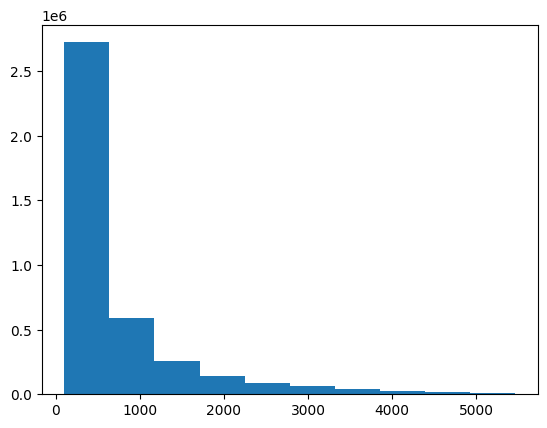

In [43]:
plt.hist(missing_count[:]);

# Computing Allele count at each site



In [101]:
%%time
m, num_alleles = root["variant_allele"].shape
gt_array = root["call_genotype"]
allele_count = np.zeros(shape=(m, num_alleles + 1), dtype=int)
j = 0
for v_chunk in tqdm(range(gt_array.cdata_shape[0])): 
    G = gt_array.blocks[v_chunk].squeeze(axis=2)
    # Map missing data to extra allele
    G[G == -1] = num_alleles
    for genotypes in G:
        allele_count[j] = np.bincount(genotypes, minlength=num_alleles)
        j += 1

  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 8min 23s, sys: 1min 42s, total: 10min 6s
Wall time: 10min 9s


In [107]:
allele_count

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 9],
       [0, 0, 0, ..., 0, 0, 9],
       [0, 0, 0, ..., 0, 0, 9]])

In [115]:
has_missing = 0
more_than_one_allele = 0
for j in range(allele_count.shape[0]):
    has_missing += allele_count[j, -1] != 0
    more_than_one_allele += np.sum(allele_count[j, :-1] != 0) > 1
has_missing, more_than_one_allele

(29903, 29728)

In [117]:
29728 / 29903

0.9941477443734742

## Get a single sample's haplotype

In [118]:
%%time
k = 1_000_000
h = gt_array[:, k].squeeze(axis=1).T

CPU times: user 191 ms, sys: 0 ns, total: 191 ms
Wall time: 191 ms


In [106]:
root["sample_id"][k]

'SRR15984815'

## Get genotypes for a single site


In [119]:
%%time
j = gt_array.shape[0] // 2
g = gt_array[j].squeeze(axis=1).T

CPU times: user 277 ms, sys: 0 ns, total: 277 ms
Wall time: 276 ms
